In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re

# Determining training epochs

The below code is meant to help determine the right number of training epochs for each task and domain

In [11]:
domains = ["laptop","rest"]
model = ["rob"]
tasks = ["ae","asc"]
prefix = "../run/"
runs = 9
file = "valid.json"
logfile = "train_log.txt"

In [12]:
data = []
for m in model:
    for t in tasks:
        for d in domains:
            for i in range(1,runs+1):
                path = prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+file
                losses = json.load(open(path, 'r'))["valid_losses"]
                log = open(prefix+m+"_"+t+"/"+d+"/"+str(i)+"/"+logfile).readlines()
                train_loss = [float(re.findall("(\d*\.\d+)",i)[0]) for i in log if i[0:14]=="training loss:"]
                for epoch in range(9):
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "type": "valid",
                            "loss": losses[epoch]
                        }
                    )
                    data.append(
                        {
                            "model":m,
                            "task":t,
                            "domain":d,
                            "run":i,
                            "epoch":epoch+1,
                            "type": "train",
                            "loss": train_loss[epoch]
                        }
                    )

data = pd.DataFrame(data)
data

,model,task,domain,run,epoch,type,loss
0,rob,ae,laptop,1,1,valid,188.730597
1,rob,ae,laptop,1,1,train,72.223083
2,rob,ae,laptop,1,2,valid,105.637147
3,rob,ae,laptop,1,2,train,62.995667
4,rob,ae,laptop,1,3,valid,127.952118
...,...,...,...,...,...,...,...
643,rob,asc,rest,9,7,train,0.011857
644,rob,asc,rest,9,8,valid,3.197809
645,rob,asc,rest,9,8,train,0.011133
646,rob,asc,rest,9,9,valid,3.268916


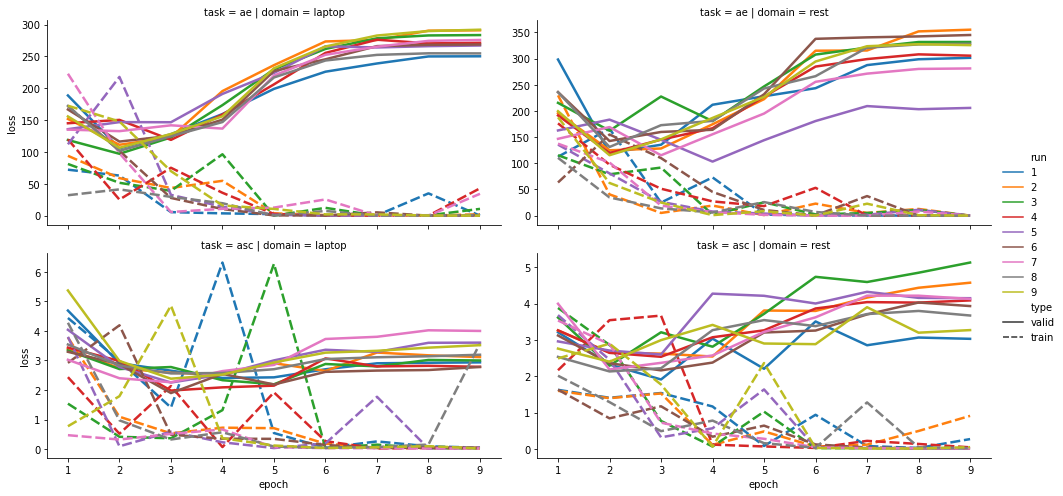

In [16]:
g = sns.FacetGrid(data, col="domain", row="task", sharey=False, height=3.5, aspect=2)
g.map_dataframe(sns.lineplot, x="epoch",
         y="loss",
         hue="run",
         palette="tab10", 
         style="type",
         linewidth=2.5)
g.add_legend()
g.savefig("validation_losses.png");

In [10]:
data.groupby(by=["model","task","domain","epoch","type"])[["loss"]]\
    .mean()\
    .reset_index()\
    .pivot(index=["model","task","domain","type"], columns=["epoch"])

loss                                      \
epoch                             1           2           3           4   
model task domain type                                                    
rob   ae   laptop train  119.893968   89.537472   36.576555   29.099314   
                  valid  152.260017  118.763093  128.886257  163.260226   
           rest   train  140.938870   90.827864   40.934889   21.006212   
                  valid  208.991930  140.849429  152.746733  169.300716   
      asc  laptop train    2.713549    1.376852    1.246384    1.179091   
                  valid    3.788609    2.799654    2.371987    2.462698   
           rest   train    2.512624    2.173400    1.330655    0.403666   
                  valid    3.189791    2.409747    2.512813    3.039879   

                                                                         \
epoch                             5           6           7           8   
model task domain type                                                    
rob   ae   laptop train    3.839557    5.501648    0.959483    4.136437   
                  valid  221.215616  254.468514  266.726086  271.958194   
           rest   train   10.901093    9.733097    8.106150    4.962618   
                  valid  218.275243  276.067478  298.599491  307.725581   
      asc  laptop train    1.121913    0.109008    0.272083    0.061555   
                  valid    2.594115    3.034056    3.104867    3.199511   
           rest   train    0.747688    0.145974    0.201221    0.086708   
                  valid    3.341265    3.670995    3.943953    3.973794   

                                     
epoch                             9  
model task domain type               
rob   ae   laptop train   10.227032  
                  valid  272.753338  
           rest   train    0.147105  
                  valid  308.724009  
      asc  laptop train    0.431300  
                  valid    3.213194  
           rest   train    0.151560  
                  valid    3.995284